In [14]:
import json
import os
import matplotlib.pyplot as plt

In [15]:
names = {
    "0.99": "./gamma_ideal",
    "0.5": "./gamma_0.5",
    "1.0": "./gamma_1.0",
}

colors = ["green", "blue", "red"]

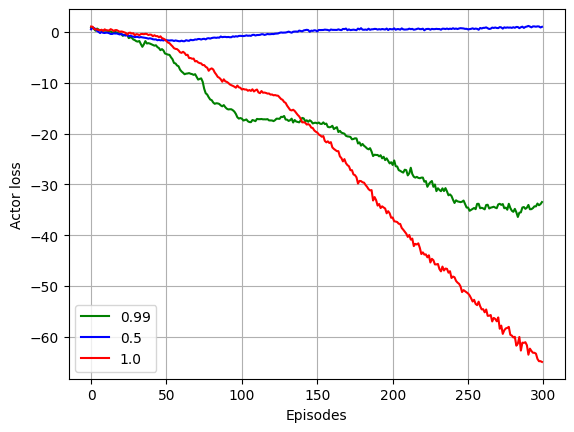

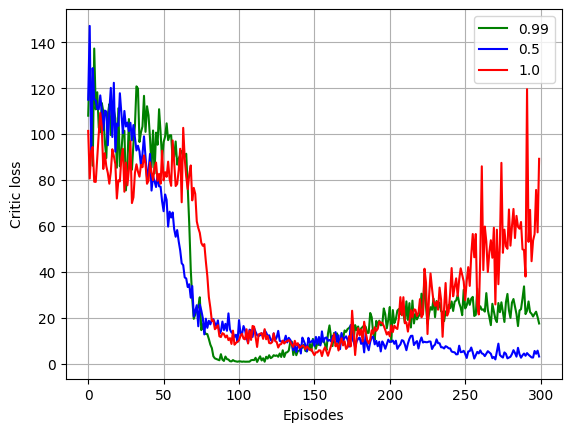

In [20]:
fig1 = plt.figure(1)
fig2 = plt.figure(2)

for ix, (name, path) in enumerate(names.items()):

    data = json.load(open(os.path.join(path, "losses.json")))
    actor_losses = data["actor"]
    critic_losses = data["critic"]

    color = colors[ix]
    plt.figure(1)
    plt.plot(range(len(actor_losses)), actor_losses, color=color, label=name)
    plt.legend()
    plt.xlabel("Episodes")
    plt.ylabel("Actor loss")
    plt.grid()

    plt.figure(2)
    plt.plot(range(len(critic_losses)), critic_losses, color=color, label=name)
    plt.legend()
    plt.xlabel("Episodes")
    plt.ylabel("Critic loss")
    plt.grid()